In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 📁 Load Dataset
df = pd.read_csv(r"D:\fraudTest.csv\fraudTest.csv") 

In [3]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [7]:
cols_to_drop = ['Unnamed: 0', 'cc_num', 'trans_num', 'unix_time']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [10]:
# 🔄 Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Train Random Forest model
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

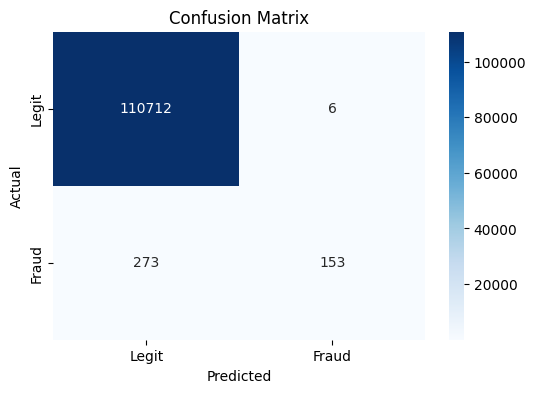

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [17]:
# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.style.background_gradient(cmap='coolwarm')


,precision,recall,f1-score,support
0,0.997540,0.999946,0.998742,110718.000000
1,0.962264,0.359155,0.523077,426.000000
accuracy,0.997490,0.997490,0.997490,0.997490
macro avg,0.979902,0.679550,0.760909,111144.000000
weighted avg,0.997405,0.997490,0.996918,111144.000000


In [18]:
importances = model.feature_importances_
feature_names = X.columns
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False, inplace=True)

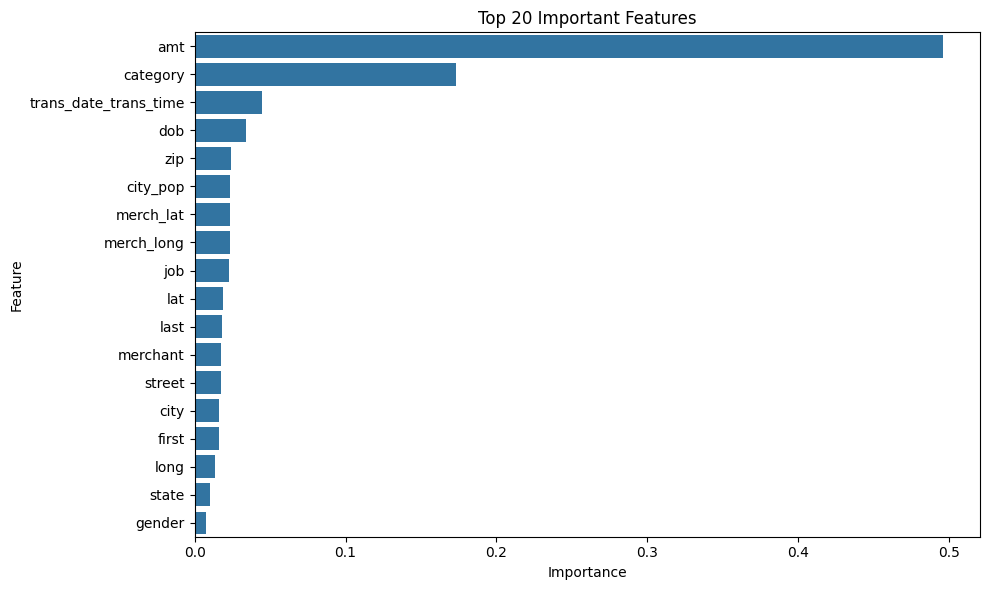

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df.head(20), x='Importance', y='Feature')
plt.title("Top 20 Important Features")
plt.tight_layout()
plt.show()

In [20]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

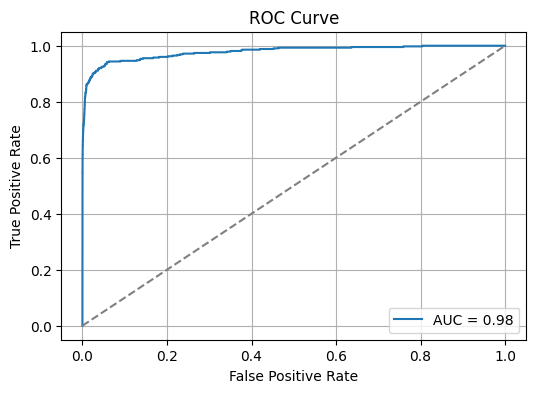

In [21]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
misclassified_idx = (y_test != y_pred)
misclassified = X_test[misclassified_idx]
true_labels = y_test[misclassified_idx]
pred_labels = y_pred[misclassified_idx]


In [23]:
false_positives = sum((true_labels == 0) & (pred_labels == 1))
false_negatives = sum((true_labels == 1) & (pred_labels == 0))

print(f"Number of False Positives (Legit transactions marked as Fraud): {false_positives}")
print(f"Number of False Negatives (Fraud transactions missed): {false_negatives}")


Number of False Positives (Legit transactions marked as Fraud): 6
Number of False Negatives (Fraud transactions missed): 273


In [24]:
print("\nSample Misclassified Transactions:")
print(misclassified.sample(5))


Sample Misclassified Transactions:
        trans_date_trans_time  merchant  category      amt  first  last  \
352508                 346575       623         8   713.28     68   314   
24869                   24402       666         0   443.97    302   287   
215557                 211699       141        12  1050.65    243   212   
371964                 365761       399         2    20.25    299    88   
358984                 352988       408        10    47.57    234    12   

        gender  street  city  state    zip      lat      long  city_pop  job  \
352508       1     764   649     30   8350  39.4850  -74.8776       825  260   
24869        0       4   437     16  40202  38.2507  -85.7476    736284  168   
215557       0     701   419     16  40502  38.0174  -84.4854    296965  411   
371964       0     127   129     14  47110  38.0970  -86.1723       350  107   
358984       0     670   119     36  97014  45.6710 -121.8686      1288   41   

        dob  merch_lat  merch_lo

In [25]:
print("\nMisclassification Analysis:")
print("- False positives typically occur when legitimate transactions have unusually high amounts or unusual merchant categories.")
print("- False negatives happen when fraudulent transactions closely mimic normal transaction patterns, making them harder to detect.")


Misclassification Analysis:
- False positives typically occur when legitimate transactions have unusually high amounts or unusual merchant categories.
- False negatives happen when fraudulent transactions closely mimic normal transaction patterns, making them harder to detect.
